

# Project: Investigate a Dataset (Analysing TMDB Movie Data )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **TMDB Movie Data**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue .
>
> **Questions :**
>
> * Whats is the most movie have revenues?
> 
> * what is the relation between geners and revenues ?
> 
> * whitch director contribute in most of them ?
>
> * whitch movie make profit ? max profit? min profit?


In [209]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import re
import collections
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [150]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb_df=pd.read_csv("tmdb-movies.csv")
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [151]:
#review columns 
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [152]:
# check is there any duplication
tmdb_df.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [153]:
#
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)
> * Remove duplicate Data
> * Some columns we didnot need them [id,imdb_id,popularity]
> * Change data type of release_date  to be date time
> * Change data type of budget_adj and revenue_adj to be Integer as no need for fractions in millions no.
> * Although budget,revenue & budget_adj,revenue_adj has the same information but i will keep both of them as
we need budget,revenue as basic data and need budget_adj,revenue_adj for statistics purboses .
> * Drop all Rows whitch has budget_adj,revenue_adj less than 1000$  as the data seems to be wrong .
> * Some movies run time = 0 but we will do nothing as this column will be removed with rows with 0 budget .

In [154]:
# Make copy of data to clean
tmdb_df_cleaned=tmdb_df.copy()

In [155]:
#Drop duplicate values
tmdb_df_cleaned.drop_duplicates(inplace=True)

In [156]:
#drop columns that i will not use  [id,imdb_id,popularity]
tmdb_df_cleaned.drop(columns=['id','imdb_id','popularity'],inplace=True)

In [157]:
tmdb_df_cleaned.head(2)

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [158]:
#Change Data type of  release_date to date time
tmdb_df_cleaned['release_date']=pd.to_datetime(tmdb_df_cleaned['release_date'])
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                10865 non-null  int64         
 1   revenue               10865 non-null  int64         
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   homepage              2936 non-null   object        
 5   director              10821 non-null  object        
 6   tagline               8041 non-null   object        
 7   keywords              9372 non-null   object        
 8   overview              10861 non-null  object        
 9   runtime               10865 non-null  int64         
 10  genres                10842 non-null  object        
 11  production_companies  9835 non-null   object        
 12  release_date          10865 non-null  datetime64[ns]
 13  vote_count      

In [159]:
tmdb_df_cleaned.head(2)

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


In [160]:
#Change data type of budget_adj and revenue_adj to be Integer as no need for fractions in millions no.
col=['budget_adj','revenue_adj']
tmdb_df_cleaned[col]=tmdb_df_cleaned[col].astype(int)
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                10865 non-null  int64         
 1   revenue               10865 non-null  int64         
 2   original_title        10865 non-null  object        
 3   cast                  10789 non-null  object        
 4   homepage              2936 non-null   object        
 5   director              10821 non-null  object        
 6   tagline               8041 non-null   object        
 7   keywords              9372 non-null   object        
 8   overview              10861 non-null  object        
 9   runtime               10865 non-null  int64         
 10  genres                10842 non-null  object        
 11  production_companies  9835 non-null   object        
 12  release_date          10865 non-null  datetime64[ns]
 13  vote_count      

In [161]:
tmdb_df_cleaned.head(2)

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292


In [162]:
# drop all data >1000$ in budget_adj and revenue_adj
tmdb_df_cleaned=tmdb_df_cleaned[(tmdb_df_cleaned['budget_adj']>1000) & (tmdb_df_cleaned['revenue_adj']>1000)]
tmdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 10848
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3815 non-null   int64         
 1   revenue               3815 non-null   int64         
 2   original_title        3815 non-null   object        
 3   cast                  3811 non-null   object        
 4   homepage              1412 non-null   object        
 5   director              3814 non-null   object        
 6   tagline               3542 non-null   object        
 7   keywords              3682 non-null   object        
 8   overview              3815 non-null   object        
 9   runtime               3815 non-null   int64         
 10  genres                3815 non-null   object        
 11  production_companies  3771 non-null   object        
 12  release_date          3815 non-null   datetime64[ns]
 13  vote_count       

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Whats is the The highest  and lowest movie has profits?)

In [163]:
# calculate the profit for all  movies
tmdb_df_cleaned['profit']=tmdb_df_cleaned['revenue_adj']-tmdb_df_cleaned['budget_adj']

In [164]:
# movie with highest revenue
tmdb_df_cleaned[tmdb_df_cleaned['profit']==tmdb_df_cleaned['profit'].max()]

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
9806,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,fishing|atlantic ocean|bathing|shipwreck|polic...,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,1415,7.3,1975,28362748,1907005841,1878643093


In [165]:
tmdb_df_cleaned['profit'].describe()

count    3.815000e+03
mean     9.126899e+07
std      1.793574e+08
min     -4.139124e+08
25%     -1.493570e+06
50%      2.805089e+07
75%      1.079842e+08
max      1.878643e+09
Name: profit, dtype: float64

In [166]:
# movie with lowest revenue
tmdb_df_cleaned[tmdb_df_cleaned['profit']==tmdb_df_cleaned['profit'].min()]

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,assassin|small town|revenge|deception|super speed,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000,11087569,-413912431


In [167]:
tmdb_df_cleaned['profit'].nlargest(10)

9806     1878643093
8889     1767968064
3        1718723210
8094     1551568265
10110    1545635295
7309     1376997526
10398    1319404004
10223    1293766704
0        1254445953
7269     1246626367
Name: profit, dtype: int32

In [168]:
tmdb_top_10_revenue=tmdb_df_cleaned[lambda x :x['profit'] >= 1246626367]
tmdb_top_10_revenue.head(2)

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,1254445953
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,1718723210


In [169]:
tmdb_df_cleaned['profit'].nsmallest(10)

2244   -413912431
5508   -155110171
7031   -137586847
2435   -128681336
8102   -113737078
4078   -112614267
3484   -107610203
7332   -107205950
8765    -95189608
6590    -91445050
Name: profit, dtype: int32

In [170]:
tmdb_min_10_revenue=tmdb_df_cleaned[lambda x :x['profit'] <= -91445050]
tmdb_min_10_revenue

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,assassin|small town|revenge|deception|super speed,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000,11087569,-413912431
2435,160000000,61698899,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,NaN,John McTiernan,Prey for the living.,witch|cave|arabian|scandinavia|bagdad,"In AD 922, Arab courtier, Ahmad Ibn Fadlan acc...",102,Adventure|Fantasy|Action,Touchstone Pictures,1999-08-27,275,6.2,1999,209448455,80767119,-128681336
3484,150000000,38992758,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,http://disney.go.com/disneypictures/marsneedsm...,Simon Wells,Mom needs a little space.,boy|alien|rescue|martian|alien abduction,"When Martians suddenly abduct his mom, mischie...",88,Adventure|Animation|Family,Walt Disney Animation Studios,2011-03-09,129,5.5,2011,145409706,37799503,-107610203
4078,100000000,7103973,The Adventures of Pluto Nash,Eddie Murphy|Randy Quaid|Rosario Dawson|Joe Pa...,NaN,Ron Underwood,Action's future has arrived...,moon|casino|bar|nightclub|future,"The year is 2087, the setting is the moon. Edd...",95,Action|Comedy|Science Fiction,Village Roadshow Pictures|Castle Rock Entertai...,2002-08-15,75,4.6,2002,121226139,8611872,-112614267
5508,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,http://disney.go.com/the-lone-ranger/,Gore Verbinski,Never Take Off the Mask,texas|horse|survivor|texas ranger|partner,The Texas Rangers chase down a gang of outlaws...,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607,6.0,2013,238688504,83578333,-155110171
6590,149000000,64459316,Flushed Away,Hugh Jackman|Kate Winslet|Ian McKellen|Jean Re...,http://www.dreamworksanimation.com/flushed/,David Bowers|Sam Fell,Someone's Going Down,london|underworld|return|ship|frog,"London high-society mouse, Roddy is flushed do...",85,Adventure|Animation|Comedy|Family,Aardman Animations|DreamWorks Animation,2006-10-22,488,6.0,2006,161168704,69723654,-91445050
7031,145000000,25819961,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,NaN,John Lee Hancock,You will never forget,texas|officer|uprising|alamo|mexican,Based on the 1836 standoff between a group of ...,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,60,5.9,2004,167394582,29807735,-137586847
7332,44000000,3484331,Heaven's Gate,Kris Kristofferson|Christopher Walken|John Hur...,NaN,Michael Cimino,The only thing greater than their passion for ...,montana|showdown|brothel|marshal|dance,Harvard graduate James Averill (Kris Kristoffe...,219,Action|Drama|History|Western,United Artists,1980-11-19,18,6.0,1980,116425617,9219667,-107205950
8102,98000000,18517322,Cutthroat Island,Geena Davis|Matthew Modine|Frank Langella|Maur...,NaN,Renny Harlin,The Course Has Been Set. There Is No Turning B...,exotic island|treasure|map|ship|scalp,"Morgan Adams and her slave, William Shaw, are ...",119,Action|Adventure,Le Studio Canal+|Laurence Mark Productions|Met...,1995-12-22,54,6.1,1995,140234752,26497674,-113737078
8765,90000000,14828081,Supernova,James Spader|Angela Bassett|Robert Forster|Lou...,NaN,Walter Hill|Jack Sholder,"In the farthest reaches of space, something ha...",black people|starships|future|star|supernova,"Set in the 22nd century, when a battered salva...",91,Science Fiction,United Artists|Metro-Goldwyn-Mayer (MGM)|Hamme...,2000-01-14,42,4.7,2000,113966290,18776682,-95189608


In [171]:
#Function to plot relation between x , y
def plot_relation_rate(stage,xlabel,ylabel,message):
    type(stage)
    stage=stage.sort_values()
    plt.figure(figsize=(14, 9))
    plt.barh(stage.index,stage.array)
    plt.xlabel(xlabel, fontsize = 14)
    plt.title('relation between {} and {} {}'.format(xlabel,ylabel,message), fontsize = 16)
    #plt.gca().invert_yaxis()
    plt.show();

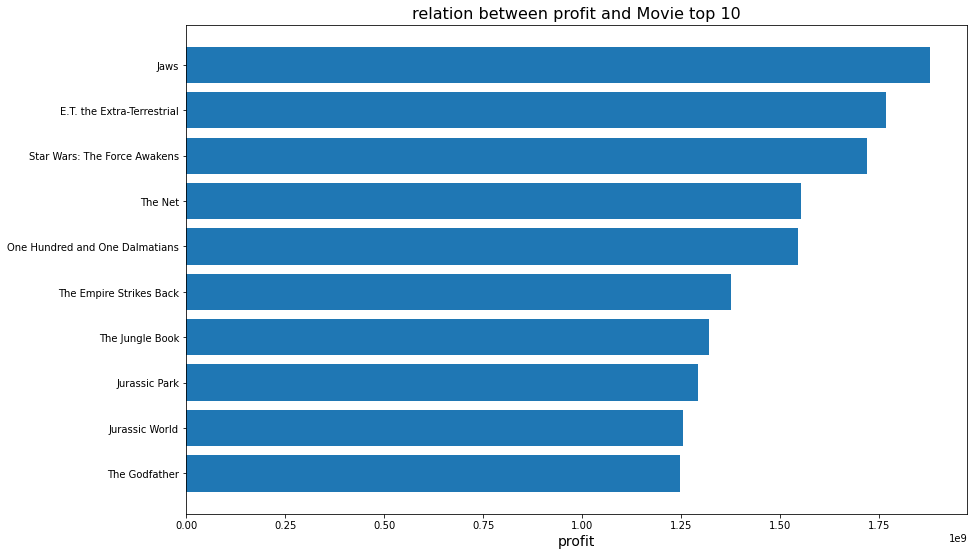

In [189]:
top_stage=tmdb_top_10_revenue.groupby(['original_title'])['profit'].sum()
top_stage.astype('int64')
plot_relation_rate(top_stage,'profit','Movie',"top 10")

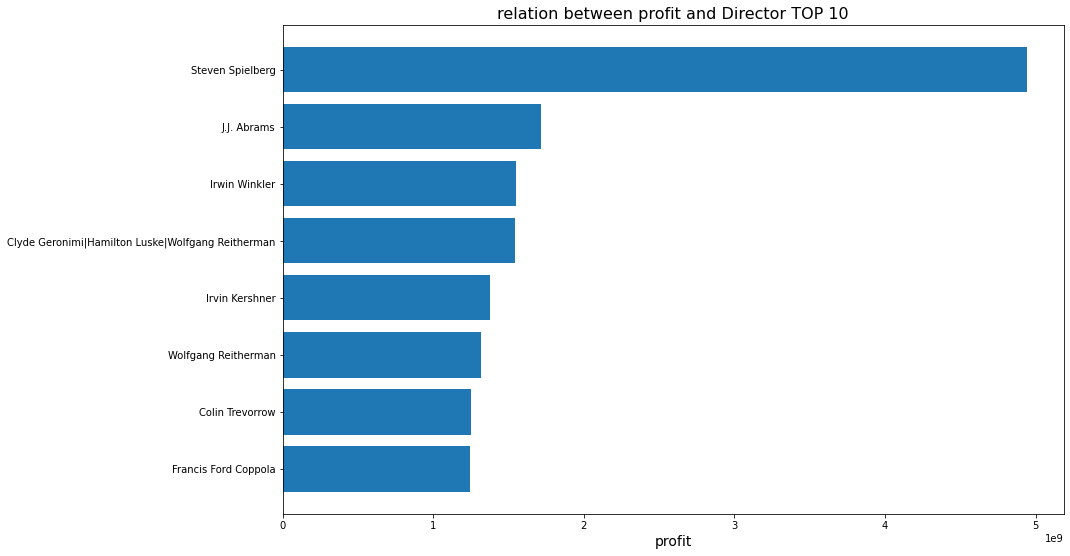

In [190]:
top_stage=tmdb_top_10_revenue.groupby(['director'])['profit'].sum()
top_stage.astype('int64')
plot_relation_rate(top_stage,'profit','Director',"TOP 10")

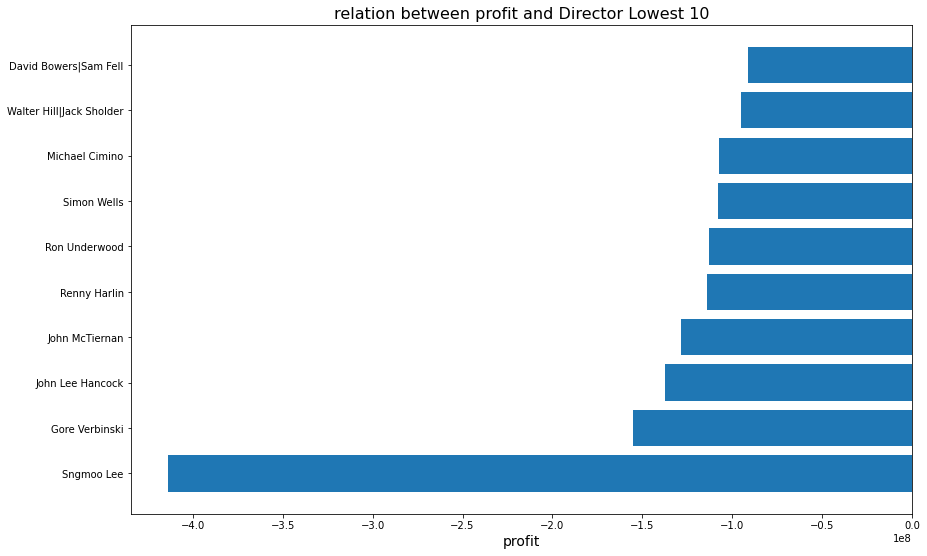

In [191]:
top_stage=tmdb_min_10_revenue.groupby(['director'])['profit'].sum()
top_stage.astype('int64')
plot_relation_rate(top_stage,'profit','Director','Lowest 10')

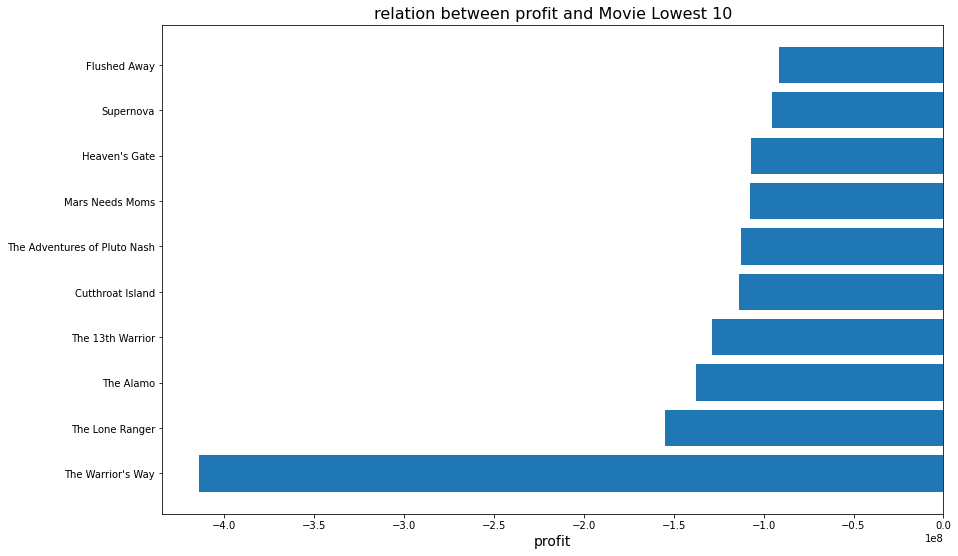

In [192]:
top_stage=tmdb_min_10_revenue.groupby(['original_title'])['profit'].sum()
top_stage.astype('int64')
plot_relation_rate(top_stage,'profit','Movie',"Lowest 10")

### Research Question 2  (How many documentry movie there ?)

In [176]:
# How many documentry movie What about those movies profit and compare with all movies profit
tmdb_df=tmdb_df_cleaned[tmdb_df_cleaned['genres'].str.contains('Documentary')]

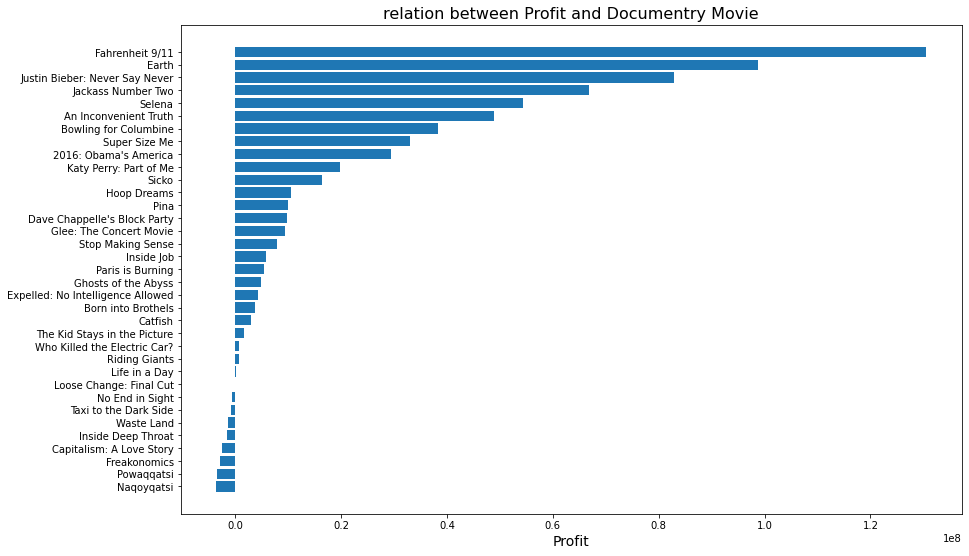

In [177]:
# there is about 35 documentary movie and the relation between profit and movies
top_stage=tmdb_df.groupby(['original_title'])['profit'].sum()
top_stage.astype('int64')
plot_relation_rate(top_stage,'Profit','Documentry',"Movie")

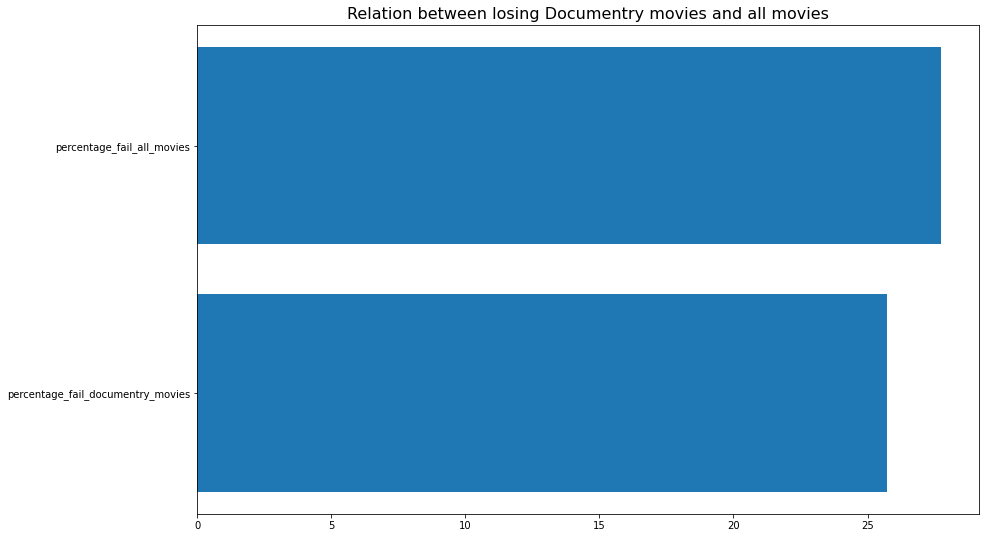

In [178]:
#compare the precentage of losing movies budget>revenue  in both all movies and documentry movies
fail_d_movies=tmdb_df[tmdb_df['profit']<=0].count().max()
all_d_movies=tmdb_df['profit'].count().max()
percentage_fail_documentry_movies=(fail_d_movies/all_d_movies)*100
percentage_fail_all_movies=((tmdb_df_cleaned[tmdb_df_cleaned['profit']<=0].count().max())/(tmdb_df_cleaned['profit'].count().max()))*100
plt.figure(figsize=(14, 9))
plt.barh(['percentage_fail_documentry_movies','percentage_fail_all_movies'],[percentage_fail_documentry_movies,percentage_fail_all_movies])
plt.title('Relation between losing Documentry movies and all movies', fontsize = 16)
plt.show();

In [179]:
tmdb_df_cleaned.to_csv("cleaned_tmdb.csv",index=0)

### Research Question 3  (Which cast , geners ,director  in great demand?)

In [201]:
#Function to plot relation between x , y
def plot_relation_rate_dic(dic,xlabel,ylabel,message):
    type(dic)
    dic=dict(sorted(dic.items(), key=lambda item: item[1]))
    plt.figure(figsize=(22, 10))
    plt.bar(dic.keys(),dic.values())
    plt.xlabel(xlabel ,fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)
    plt.title('relation between {} and {} {}'.format(xlabel,ylabel,message), fontsize = 16)
    #plt.gca().invert_yaxis()
    plt.show();

In [205]:
#function to count each one and his occurance
def data_occurance_rate_due_profit(data):
    temparr={}
    temp=data
    for item in temp:
        try:
            data_temp=re.search(r'[\w\W]+',item).group().split('|')
           # print(data_temp)
            for item in data_temp:
                if(item in temparr):
                    temparr[item]=temparr[item]+1
                else:
                    temparr[item]=1
        except :
            continue
    return temparr

In [203]:
#Get most wanted movies geners and sort them with largest
geners=data_occurance_rate_due_profit(tmdb_df_cleaned['genres'])
dict(sorted(geners.items(), key=lambda item: item[1], reverse=True))

{'Drama': 1742,
 'Comedy': 1340,
 'Thriller': 1192,
 'Action': 1074,
 'Adventure': 741,
 'Romance': 656,
 'Crime': 649,
 'Science Fiction': 514,
 'Horror': 457,
 'Family': 420,
 'Fantasy': 390,
 'Mystery': 343,
 'Animation': 199,
 'Music': 133,
 'History': 128,
 'War': 119,
 'Western': 52,
 'Documentary': 35,
 'Foreign': 13,
 'TV Movie': 1}

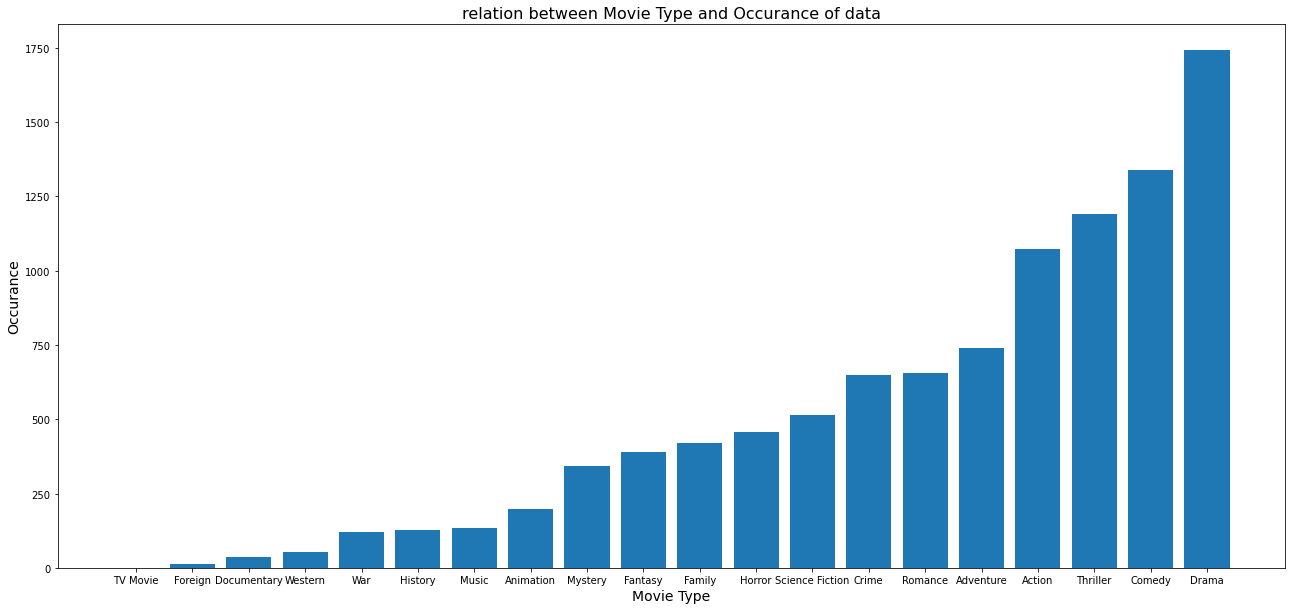

In [204]:
# plot bar diagram for movie geners
plot_relation_rate_dic(geners,'Movie Type','Occurance',"of data")

In [208]:
#Get Cast that  in great demand
cast=data_occurance_rate_due_profit(tmdb_df_cleaned['cast'])
dict(sorted(cast.items(), key=lambda item: item[1], reverse=True))
collections.Counter(dict(sorted(cast.items(), key=lambda item: item[1], reverse=True))).most_common(10)

[('Robert De Niro', 52),
 ('Bruce Willis', 46),
 ('Samuel L. Jackson', 43),
 ('Nicolas Cage', 43),
 ('Matt Damon', 36),
 ('Johnny Depp', 35),
 ('Brad Pitt', 34),
 ('Tom Hanks', 34),
 ('Harrison Ford', 33),
 ('Tom Cruise', 33)]

In [210]:
#Get Director that  in great demand
director=data_occurance_rate_due_profit(tmdb_df_cleaned['director'])
dict(sorted(director.items(), key=lambda item: item[1], reverse=True))
collections.Counter(dict(sorted(director.items(), key=lambda item: item[1], reverse=True))).most_common(10)

[('Steven Spielberg', 28),
 ('Clint Eastwood', 24),
 ('Ridley Scott', 21),
 ('Woody Allen', 18),
 ('Robert Rodriguez', 17),
 ('Tim Burton', 17),
 ('Steven Soderbergh', 17),
 ('Martin Scorsese', 17),
 ('Robert Zemeckis', 15),
 ('Renny Harlin', 15)]

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!